### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_palette('crest', 13)

from scipy.stats import norm

# display all columns
pd.options.display.max_columns = None

# display all rows
pd.options.display.max_rows = None

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

from catboost import Pool
import shap

import warnings
warnings.filterwarnings("ignore")

### Importing Train and Test DataSet 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### Train and Test DataSet size

In [3]:
print('Train DataSet size: ',df_train.shape)
print('Test DataSet Size: ', df_test.shape)

Train DataSet size:  (1460, 81)
Test DataSet Size:  (1459, 80)


In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

* Test dataset doesn't have `SalePrice` column as it is a target columns
* So our aim is to predict SalePrice based on test dataset

In [6]:
test_id = df_test['Id']

In [7]:
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

### Null value check

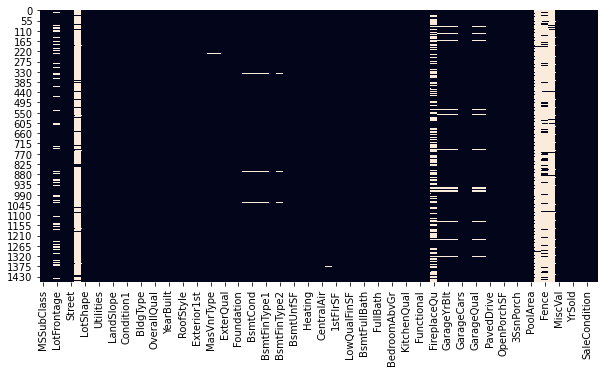

In [8]:
plt.figure(figsize = (10,5))
sns.heatmap(df_train.isnull(), cbar = False);

**Interpretation:**
* There are null values present in lot of columns
* so we will impute them accordingly

In [9]:
df_train_num = df_train.select_dtypes(np.number)
df_test_num = df_test.select_dtypes(np.number)

In [10]:
df_train_cat = df_train.select_dtypes('O')
df_test_cat = df_test.select_dtypes('O')

#### Datetime variables

In [11]:
year_features = [col for col in df_train_num if 'year' in col.lower() or 'yr' in col.lower()]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
for feature in year_features:
    print(feature, ':', df_train_num[feature].unique(), '\n')

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1

**Let's check the relation between all the datetime features with `YrSold` variable**

In [13]:
# for col in year_features:
#     if col != 'YrSold':
#         data = df_train.copy()
#         data[col] = data['YrSold'] - data[col]
#         plt.scatter(data[col], data['SalePrice'])
#         plt.show()

In [14]:
for col in df_train_num:
    print(col, ':', len(df_train_num[col].unique()))

MSSubClass : 15
LotFrontage : 111
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 328
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageYrBlt : 98
GarageCars : 5
GarageArea : 441
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
3SsnPorch : 20
ScreenPorch : 76
PoolArea : 8
MiscVal : 21
MoSold : 12
YrSold : 5
SalePrice : 663


**There are two types of numerical variables:**
 1. Continuous Variable
 2. Discrete Variable

**Discrete Variable**

In [15]:
train_dis_var = [col for col in df_train_num if (len(df_train_num[col].unique()) < 25) and col not in year_features]
train_con_var = [col for col in df_train_num if col not in train_dis_var + year_features]

In [16]:
test_dis_var = [col for col in df_test_num if (len(df_test_num[col].unique()) < 25) and col not in year_features]
test_con_var = [col for col in df_test_num if col not in test_dis_var + year_features]

### Relation of discrete numerical variables with SalePrice

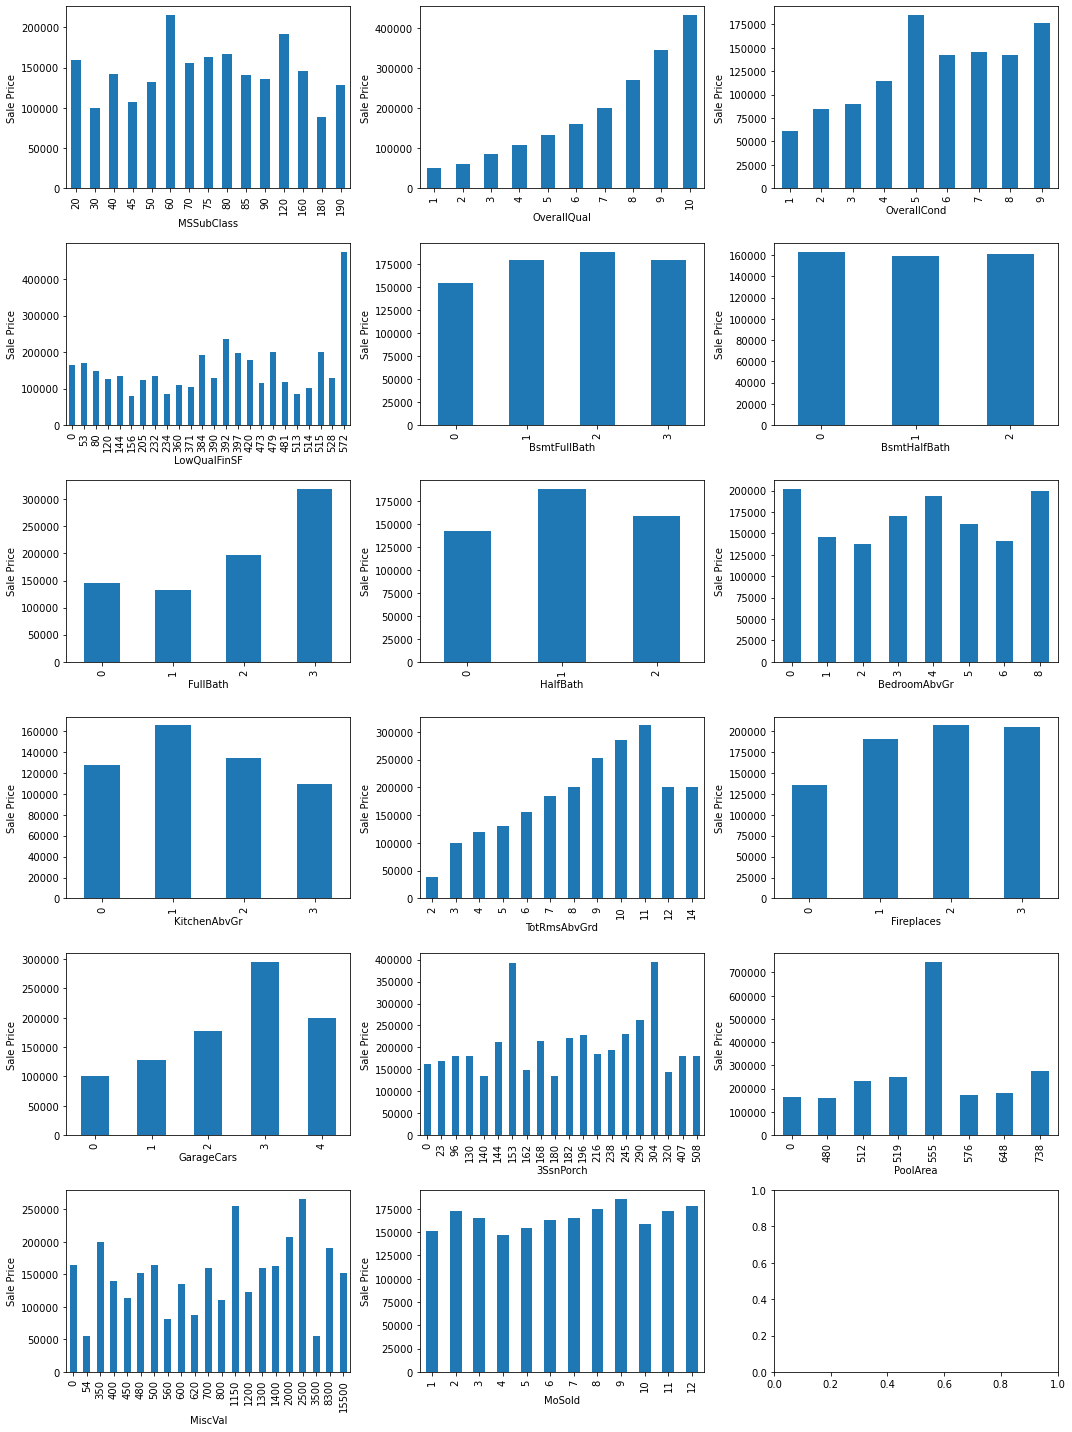

In [17]:
fig, ax = plt.subplots(6,3, figsize = (15,20))

for variable, subplot in zip(df_train_num[train_dis_var], ax.flatten()):
    barplot = df_train_num.groupby(variable)['SalePrice'].median().plot(kind = 'bar', ax = subplot)
    barplot.set_ylabel('Sale Price')
plt.tight_layout()
plt.show()

**Interpretation:**
* We can clearly see the relation between numerical variables and `SalePrice`
* As the overallquality of the house increases selling price also increases
* House having more no. of full bathrooms tend to have high selling price
* People give preference to the fireplaces, we can see for house having 2 or 3 fireplaces has the high selling price
* as the size of garage in car capacity increases, house price tend to increase
* Houses having medium pool area also has high selling price

### Relation of Categorical variables with SalePrice

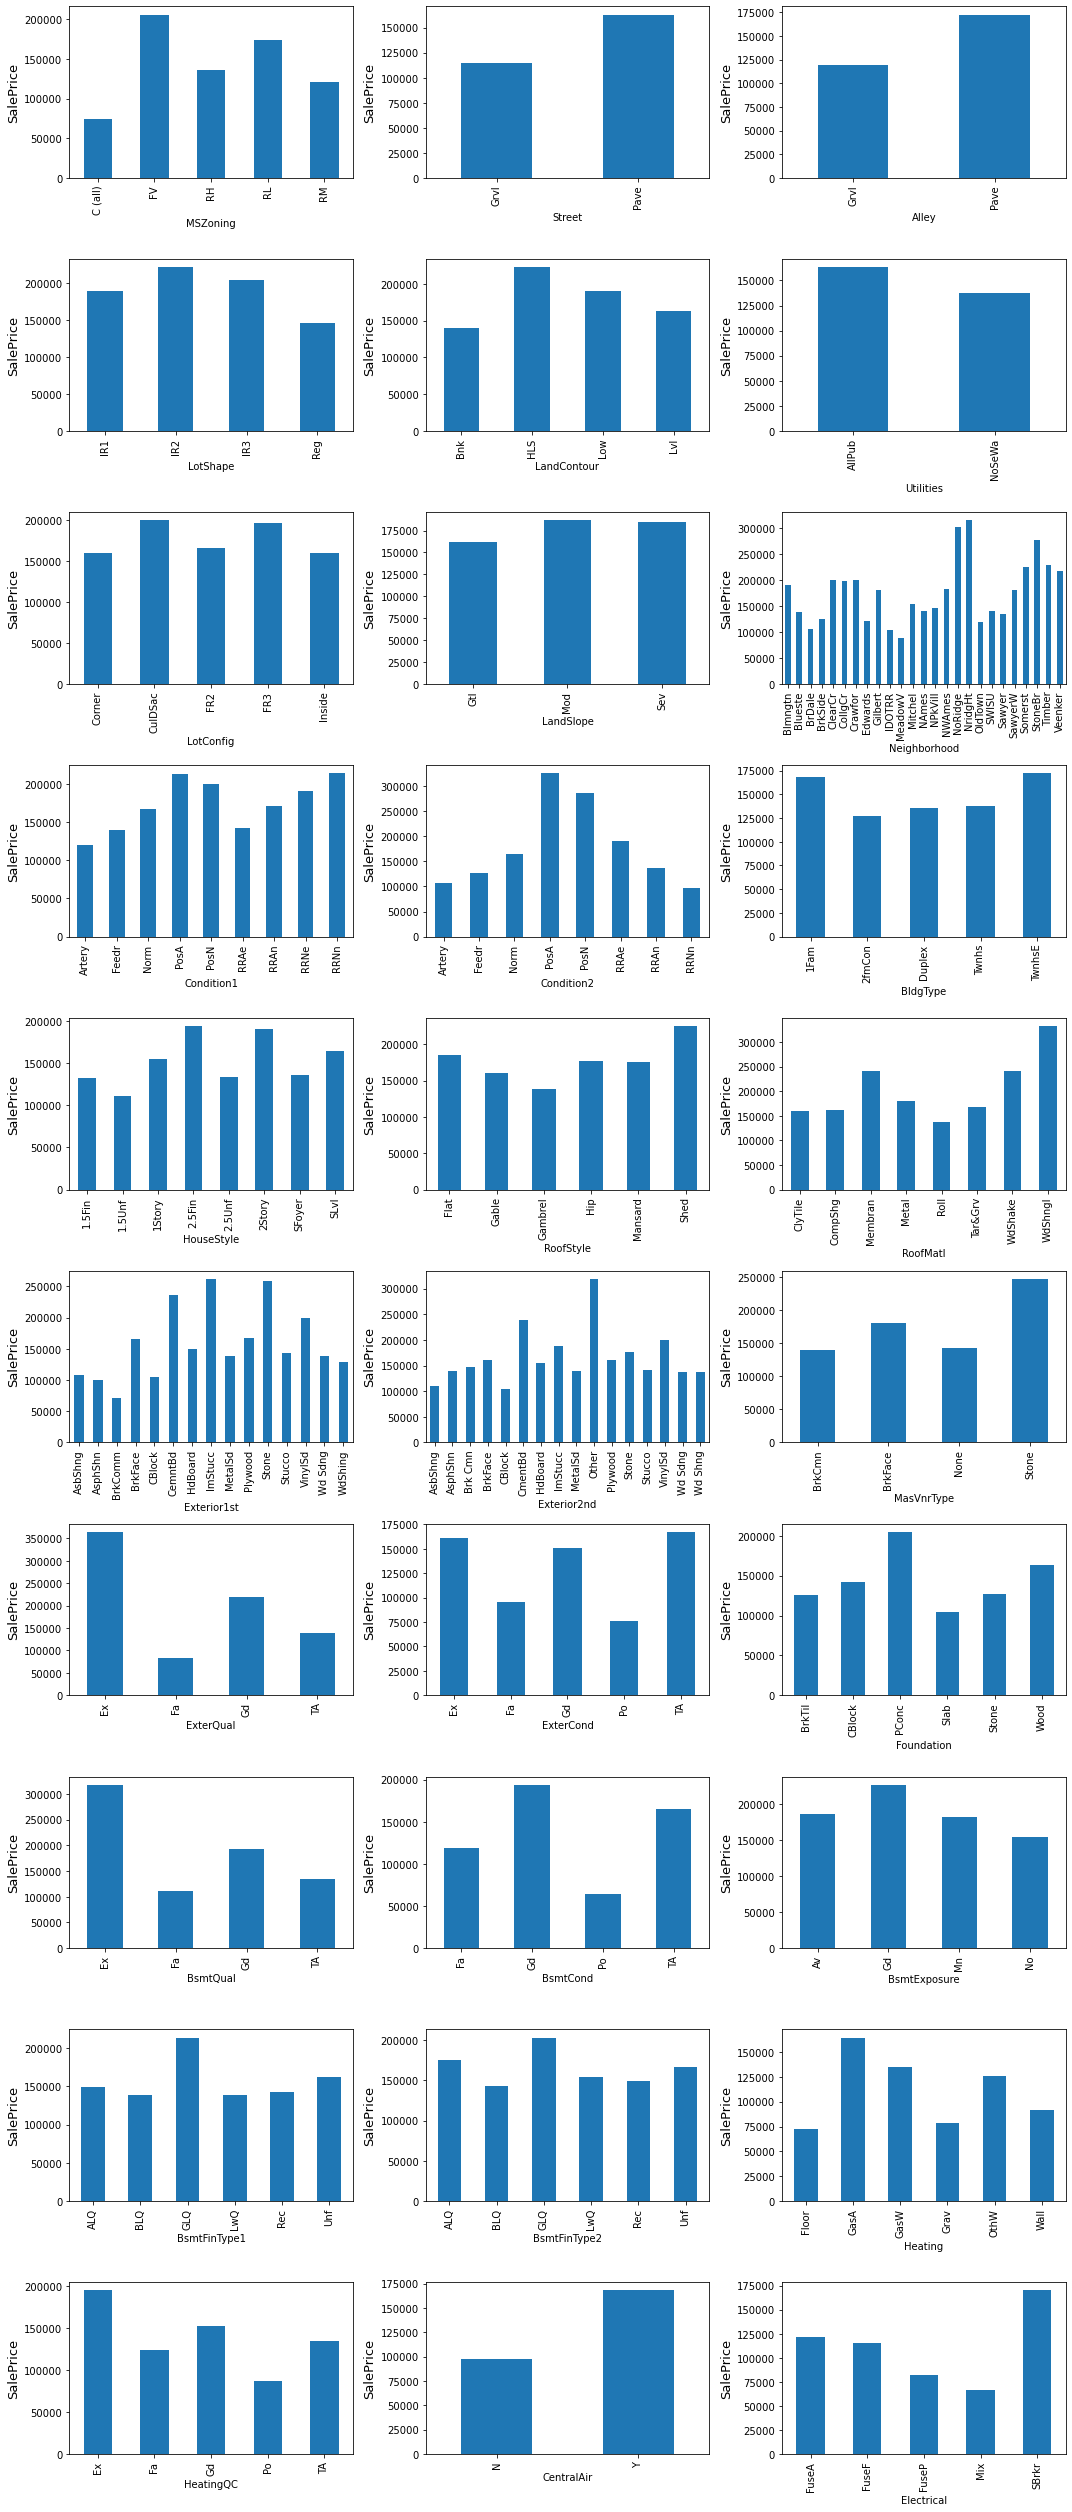

In [18]:
fig, ax = plt.subplots(10, 3, figsize = (15,35))

for variable, subplot in zip(df_train_cat, ax.flatten()):
    barplot = df_train.groupby(variable)['SalePrice'].median().plot(kind = 'bar', ax = subplot)
    barplot.set_ylabel('SalePrice', fontsize = 13)
plt.tight_layout()    
plt.show()

**Interpretation:**
* We can see, Selling Price of house depends upon various factors
* It depends on type of road access to the house 
* House price is highly dependent on the neighbourhood
* Also price varies according to the Roomstyle and roofmaterial of the house
* Main factor when it comes to house price is exterior material quality
* As the basement height changes, price also changes

### Countplot for categorical variables

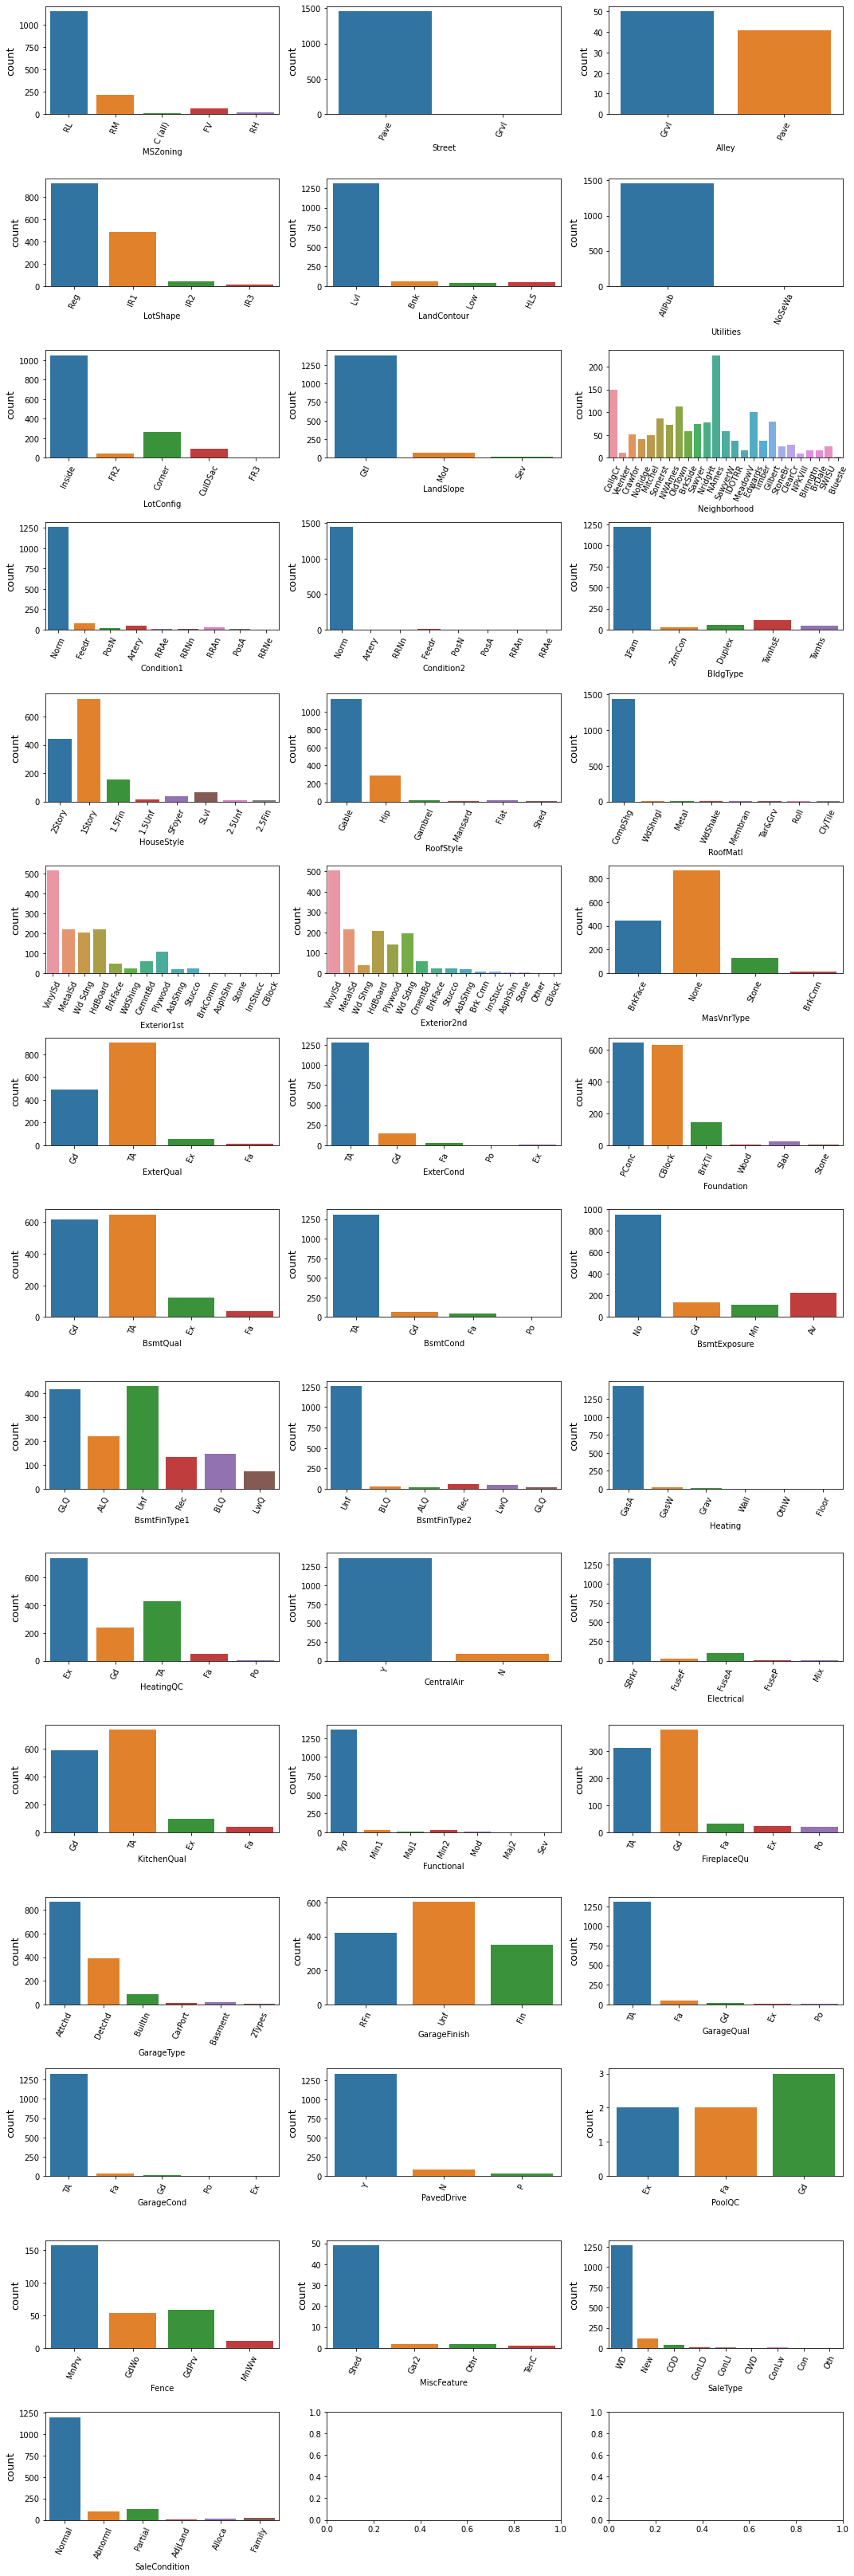

In [19]:
fig, ax = plt.subplots(15,3, figsize = (15,45))

for variable, subplot in zip(df_train_cat, ax.flatten()):
    countplot = sns.countplot(df_train_cat[variable], ax = subplot)
    countplot.set_ylabel('count', fontsize = 13)
    countplot.set_xticklabels(labels = countplot.get_xticklabels(), rotation = 65)
plt.tight_layout()
plt.show()

**Interpretation:**
* we can clearly see that there is lot of variation in count of differnt categories under same variable
* Road access is mostly a pave road
* Most of the house in the dataset falls under 'Names' category
* 'Gable' is the most preferred roofstyle
* Mostly roof material is 'CompShg'
* Heating column is having 'GasA' as dominating a category
* There are less number of houses having no central air
* for most of the houses electrical system is 'SBrkr'
* in general condition of sale is always 'Normal'

### Distribution of Numerical variables

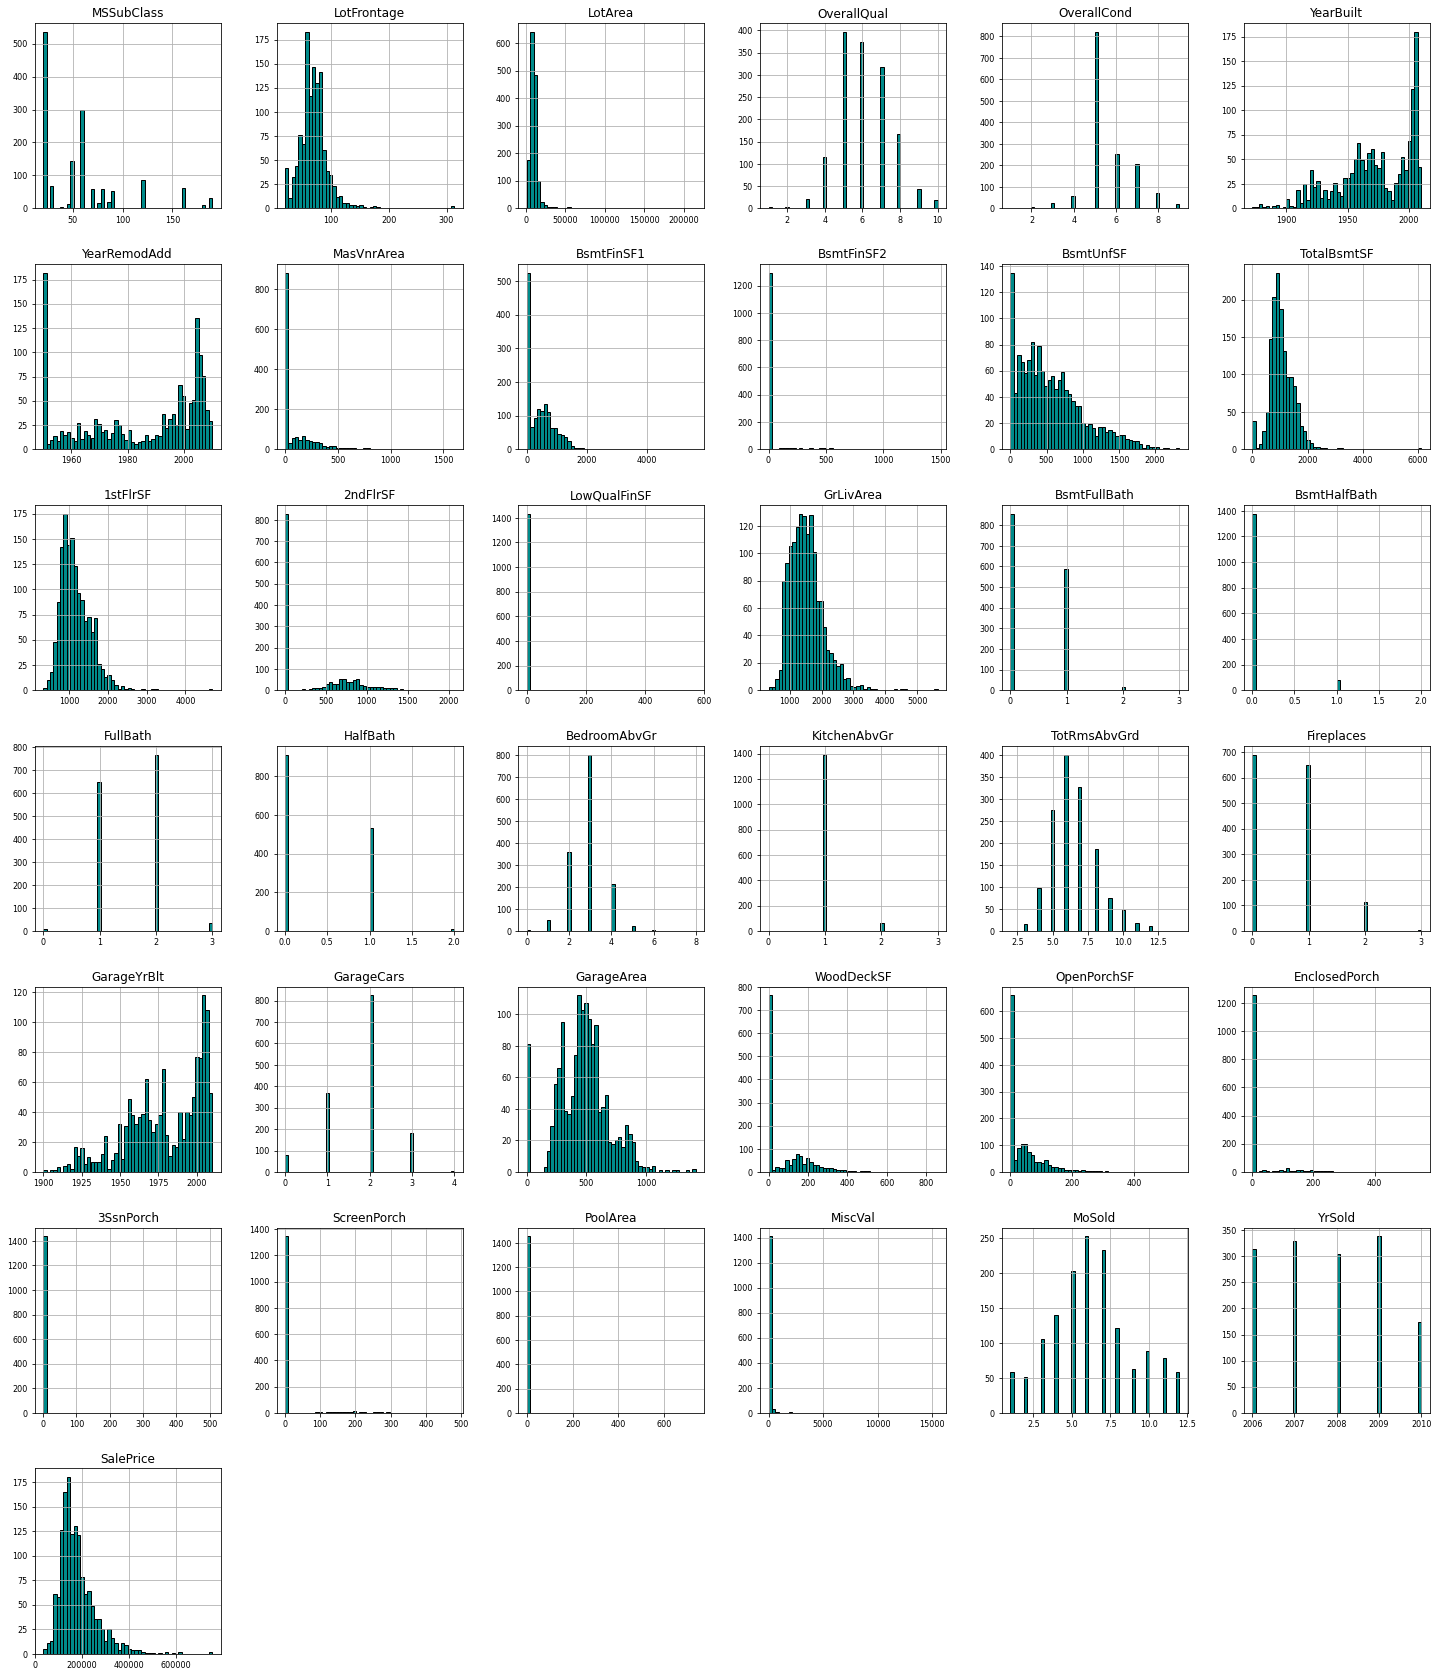

In [20]:
fig_ = df_train_num.hist(figsize=(25, 30), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

**Interpretation:**
* `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`
these columns are right skewed columns
* `YearBuilt` and `GarageYrBlt` are right skewed columns
* `SalePrice` is a target variable and it is right skewed
* other variables are discreate numerical features as we have already seen in previous graphs

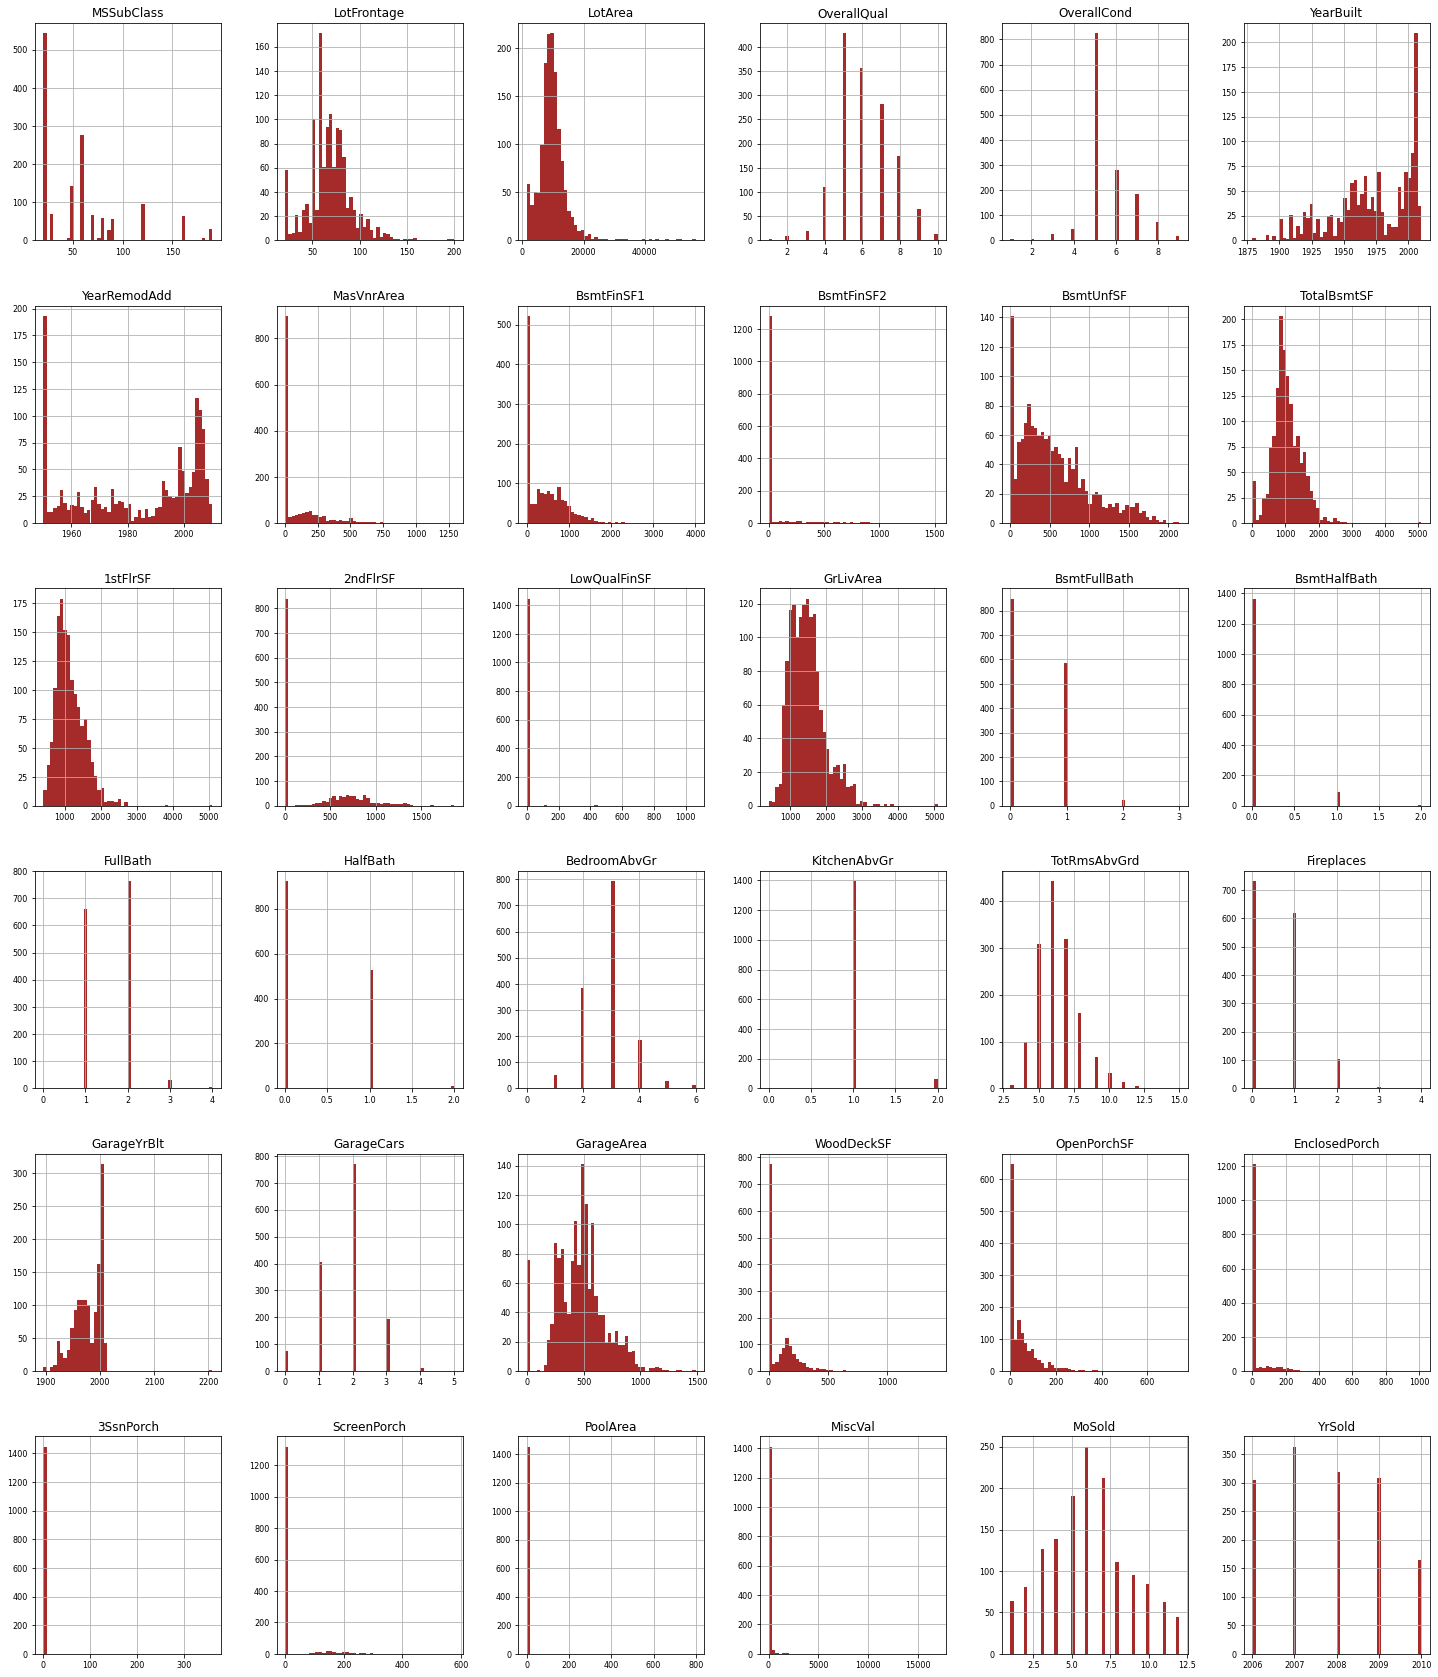

In [21]:
df_test_num.hist(figsize = (25,30), bins = 50, color = 'brown', xlabelsize = 8, ylabelsize = 8);

**Interpretation:**
* `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`
these columns are right skewed columns
* `YearBuilt` and `GarageYrBlt` are right skewed columns
* `SalePrice` is a target variable and it is right skewed
* other variables are discreate numerical features as we have already seen in previous graphs

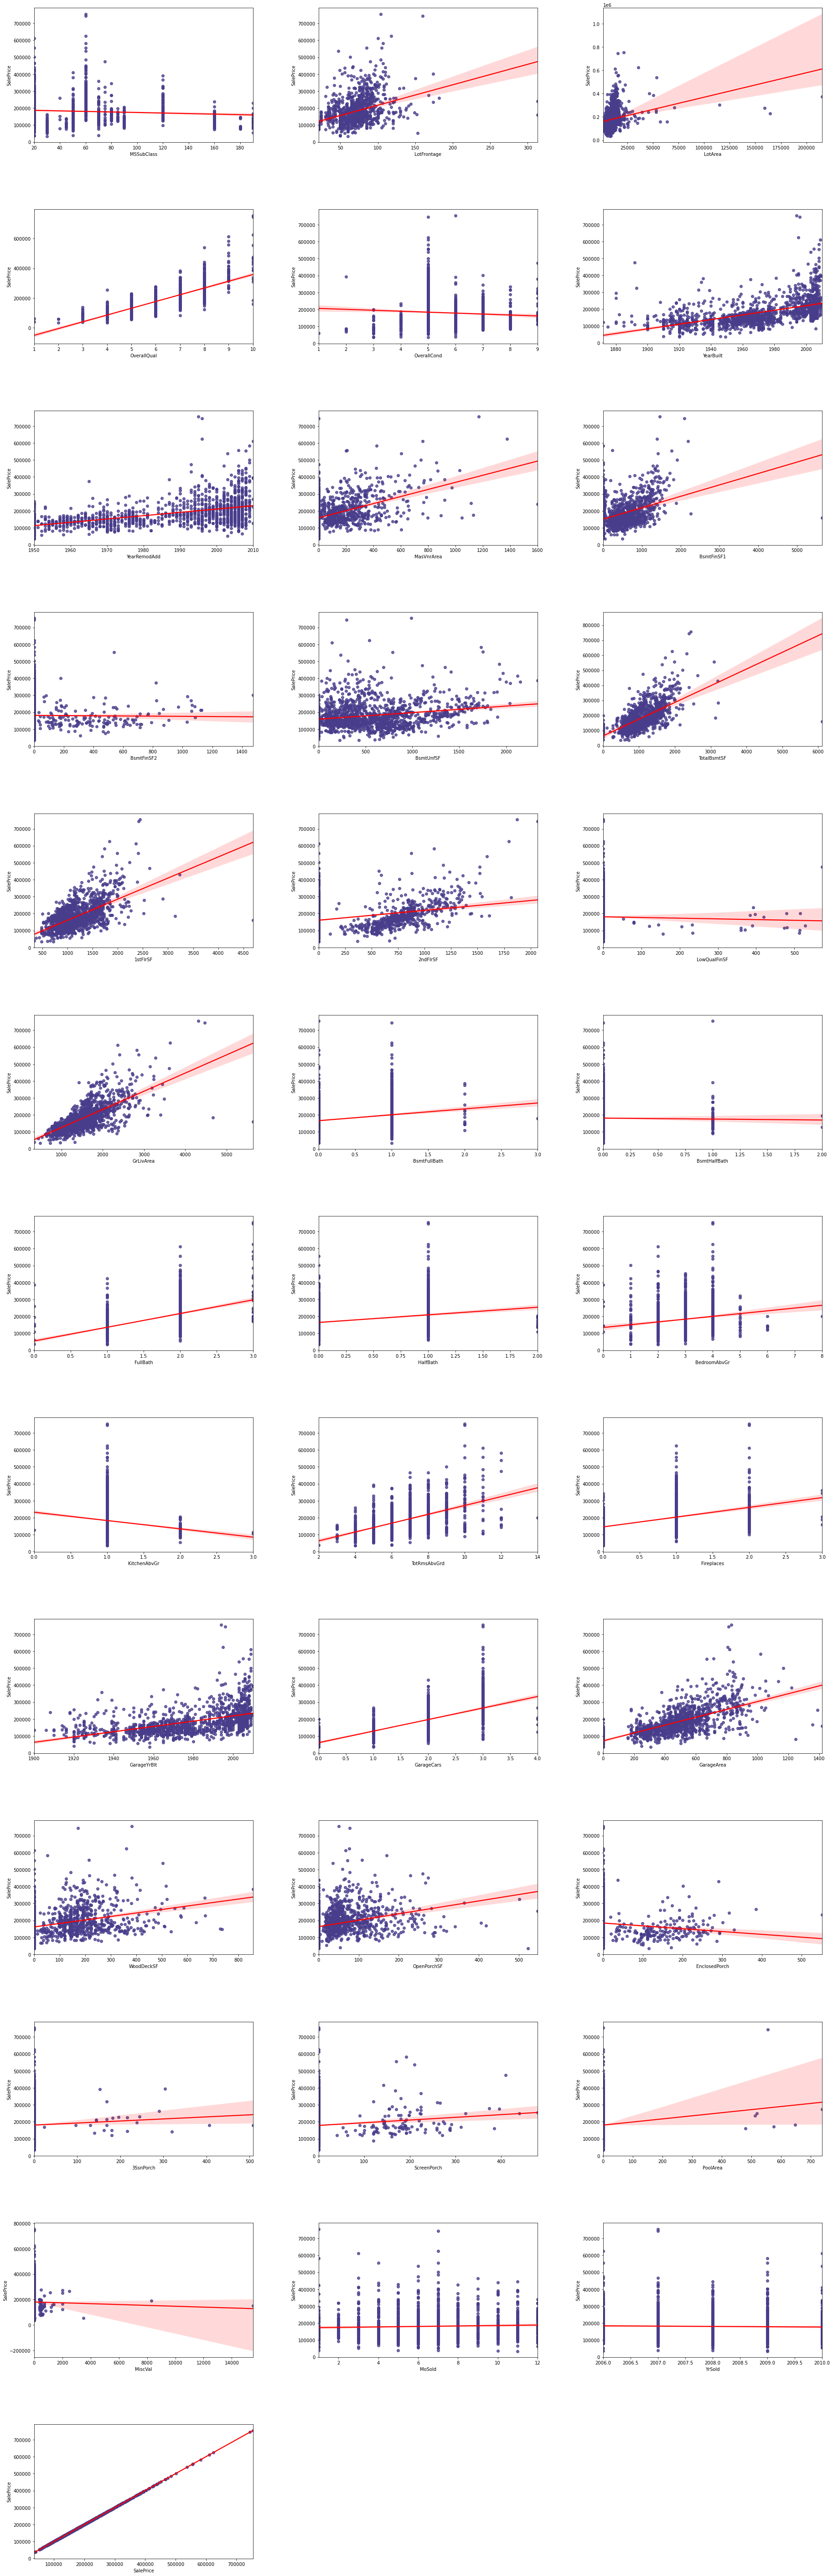

In [22]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

**Interpretation:**
* We can see, there is positive linear relationship between independent variable and SalePrice
* as the value assigned to the predictor standing for the potential of the house increases, the sale price increases as well
* `GrLivArea` and `OverallQual` are highly correlated with the `SalePrice`
* `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath`, `TotRmsAbvGrd`, `YearBuilt` and `YearRemodAdd` are moderately correlated with `SalePrice`
* all remaining variables are weakly correlated `SalePrice`

### Null value Imputation

In [23]:
total = df_train.isnull().sum().sort_values(ascending = False)
percentage = np.round((df_train.isnull().sum() * 100/ df_train.isnull().count()),2).sort_values(ascending = False)

df_null = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage of null values'])
df_null

Total  Percentage of null values
PoolQC          1453                      99.52
MiscFeature     1406                      96.30
Alley           1369                      93.77
Fence           1179                      80.75
FireplaceQu      690                      47.26
LotFrontage      259                      17.74
GarageYrBlt       81                       5.55
GarageCond        81                       5.55
GarageType        81                       5.55
GarageFinish      81                       5.55
GarageQual        81                       5.55
BsmtExposure      38                       2.60
BsmtFinType2      38                       2.60
BsmtCond          37                       2.53
BsmtQual          37                       2.53
BsmtFinType1      37                       2.53
MasVnrArea         8                       0.55
MasVnrType         8                       0.55
Electrical         1                       0.07
MSSubClass         0                       0.00
Fireplaces         0                       0.00
Functional         0                       0.00
KitchenQual        0                       0.00
KitchenAbvGr       0                       0.00
BedroomAbvGr       0                       0.00
HalfBath           0                       0.00
FullBath           0                       0.00
BsmtHalfBath       0                       0.00
TotRmsAbvGrd       0                       0.00
GarageCars         0                       0.00
GrLivArea          0                       0.00
GarageArea         0                       0.00
PavedDrive         0                       0.00
WoodDeckSF         0                       0.00
OpenPorchSF        0                       0.00
EnclosedPorch      0                       0.00
3SsnPorch          0                       0.00
ScreenPorch        0                       0.00
PoolArea           0                       0.00
MiscVal            0                       0.00
MoSold             0                       0.00
YrSold             0                       0.00
SaleType           0                       0.00
SaleCondition      0                       0.00
BsmtFullBath       0                       0.00
CentralAir         0                       0.00
LowQualFinSF       0                       0.00
Neighborhood       0                       0.00
OverallCond        0                       0.00
OverallQual        0                       0.00
HouseStyle         0                       0.00
BldgType           0                       0.00
Condition2         0                       0.00
Condition1         0                       0.00
LandSlope          0                       0.00
2ndFlrSF           0                       0.00
LotConfig          0                       0.00
Utilities          0                       0.00
LandContour        0                       0.00
LotShape           0                       0.00
Street             0                       0.00
LotArea            0                       0.00
YearBuilt          0                       0.00
YearRemodAdd       0                       0.00
RoofStyle          0                       0.00
RoofMatl           0                       0.00
Exterior1st        0                       0.00
Exterior2nd        0                       0.00
ExterQual          0                       0.00
ExterCond          0                       0.00
Foundation         0                       0.00
BsmtFinSF1         0                       0.00
BsmtFinSF2         0                       0.00
BsmtUnfSF          0                       0.00
TotalBsmtSF        0                       0.00
Heating            0                       0.00
HeatingQC          0                       0.00
MSZoning           0                       0.00
1stFlrSF           0                       0.00
SalePrice          0                       0.00

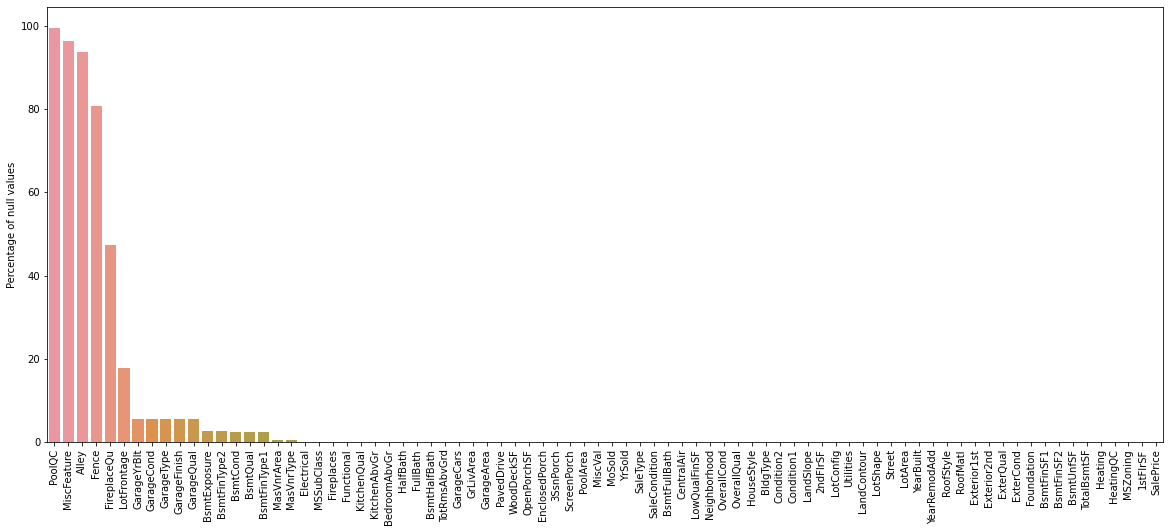

In [24]:
plt.figure(figsize = (20,8))
sns.barplot(df_null.index, df_null['Percentage of null values'])
plt.xticks(rotation = 90);

In [25]:
df_null_train = df_null[df_null['Percentage of null values'] > 20]
df_null_train

Total  Percentage of null values
PoolQC        1453                      99.52
MiscFeature   1406                      96.30
Alley         1369                      93.77
Fence         1179                      80.75
FireplaceQu    690                      47.26

**Interpretation:**
* we can see, there are 5 columns containing more than 20% null values
* so we will remove drop those columns

In [26]:
total = df_test.isnull().sum().sort_values(ascending = False)
percentage = np.round((df_test.isnull().sum() * 100/ df_test.isnull().count()),2).sort_values(ascending = False)

df_null = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage of missing values'])
df_null_test = df_null[df_null['Percentage of missing values'] > 20]
df_null_test

Total  Percentage of missing values
PoolQC        1456                         99.79
MiscFeature   1408                         96.50
Alley         1352                         92.67
Fence         1169                         80.12
FireplaceQu    730                         50.03

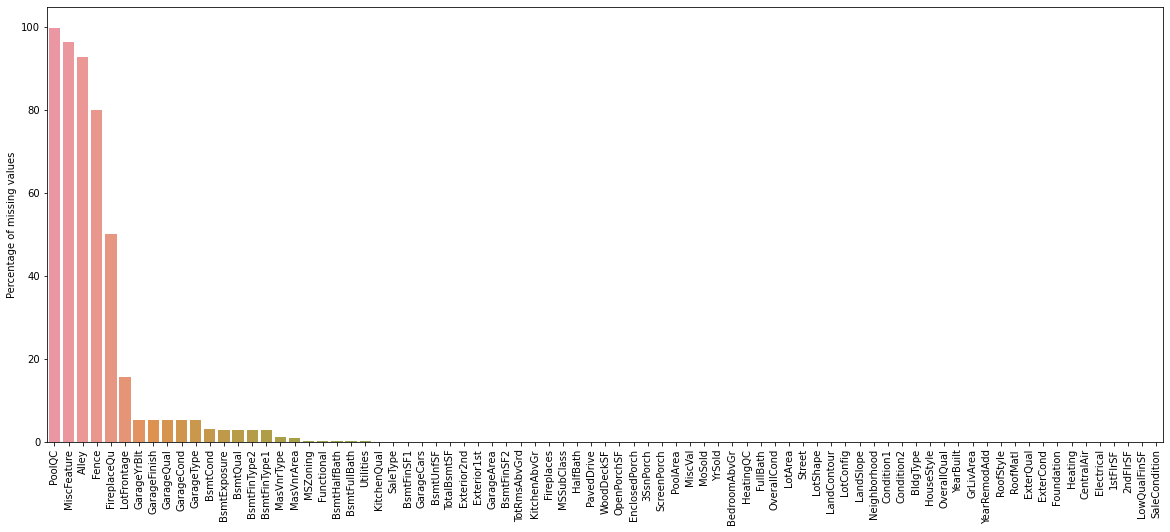

In [27]:
plt.figure(figsize = (20,8))
sns.barplot(df_null.index, df_null['Percentage of missing values'])
plt.xticks(rotation = 90);

**Interpretation:**
* We can see, in test dataset also there are  5 columns containing more than 20% null values
* so we will drop those columns

In [28]:
df_train.drop(df_null_train.index, axis = 1, inplace = True)
df_test.drop(df_null_test.index, axis = 1, inplace = True)

In [29]:
print('Train dataset: ',df_train.shape)
print('Test dataset: ',df_test.shape)

Train dataset:  (1460, 75)
Test dataset:  (1459, 74)


**we can see reduced shape of train and test dataset**

### Exploring Categorical Variables in Train Dataset

In [30]:
df_train_cat = df_train.select_dtypes('O')
df_train_cat.describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1460       1460       1460     1460       1460      1460   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            225       1260       1445     1220        726      1141   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1460        1460        1460       1452      1460      1460   
unique        8          15          16          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1434         515         504        864       906      1282   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1460     1423     1423         1422         1423         1422   
unique          6        4        4            4            6            6   
top         PConc       TA       TA           No          Unf          Unf   
freq          647      649     1311          953          430         1256   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1460      1460       1460       1459        1460       1460   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1428       741       1365       1334         735       1360   

       GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
count        1379         1379       1379       1379       1460     1460   
unique          6            3          5          5          3        9   
top        Attchd          Unf         TA         TA          Y       WD   
freq          870          605       1311       1326       1340     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198

**Interpretation:**
* There are some categrical columns containing null values
* so we will impute them with mode value

**Replacing null values in categorical variables from train dataset with mode**

In [31]:
for feature in df_train_cat:
    df_train_cat[feature] = df_train_cat[feature].fillna(df_train_cat[feature].mode()[0])

In [32]:
null_feat = [feature for feature in df_train_cat.isnull().mean() if feature > 0.0]        
if len(null_feat) == 0:
    print('There are no null values present')

There are no null values present


### Exploring Categorical Variables in Test Dataset

In [33]:
df_test_cat = df_test.select_dtypes('O')
df_test_cat.describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1455   1459     1459        1459      1457      1459      1459   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1114   1453      934        1311      1457      1081      1396   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1459       1459       1459     1459       1459      1459   
unique           25          9          5        5          7         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            218       1251       1444     1205        745      1169   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1459        1458        1458       1443      1459      1459   
unique        4          13          15          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1442         510         510        878       892      1256   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1459     1415     1414         1415         1417         1417   
unique          6        4        4            4            6            6   
top         PConc       TA       TA           No          GLQ          Unf   
freq          661      634     1295          951          431         1237   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1459      1459       1459       1459        1458       1457   
unique       4         5          2          4           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1446       752       1358       1337         757       1357   

       GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
count        1383         1381       1381       1381       1459     1458   
unique          6            3          4          5          3        9   
top        Attchd          Unf         TA         TA          Y       WD   
freq          853          625       1293       1328       1301     1258   

       SaleCondition  
count           1459  
unique             6  
top           Normal  
freq            1204

**Interpretation:**
* There are some categrical columns containing null values
* so we will impute them with mode value

**Replacing null values in categorical variables from test dataset with mode**

In [34]:
for feature in df_test_cat:
    df_test_cat[feature] = df_test_cat[feature].fillna(df_test_cat[feature].mode()[0])

In [35]:
null_feat = [feature for feature in df_test_cat.isnull().mean() if feature > 0.0]        
if len(null_feat) == 0:
    print('There are no null values present')

There are no null values present


**Summary Statistics of Numerical variables in train dataset**

In [36]:
df_train_num = df_train.select_dtypes(np.number)
df_train_num.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

from above summary statistics we can observe
* `LotFrontage` , `MasVnrArea` are continuous numerical variables, so we will replace the missing values ny median value
* `GarageYrBlt` column is year feature, so we will replace the missing values by mode value

In [37]:
df_train_num['LotFrontage'] = df_train_num['LotFrontage'].fillna(df_train_num['LotFrontage'].median())
df_train_num['MasVnrArea'] = df_train_num['MasVnrArea'].fillna(df_train_num['MasVnrArea'].median())
df_train_num['GarageYrBlt'] = df_train_num['GarageYrBlt'].fillna(df_train_num['GarageYrBlt'].mode()[0])

In [38]:
null_feat = [feature for feature in df_train_num.isnull().mean() if feature > 0.0]        
if len(null_feat) == 0:
    print('There are no null values present')

There are no null values present


**Summary Statistics of Numerical variables in test dataset**

In [39]:
df_test_num = df_test.select_dtypes(np.number)
df_test_num.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342   
std      30.390071     21.130467   177.625900   455.268042   176.753926   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   753.500000     0.000000   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean    554.294925  1046.117970  1156.534613   325.967786      3.543523   
std     437.260486   442.898624   398.165820   420.610226     44.043251   
min       0.000000     0.000000   407.000000     0.000000      0.000000   
25%     219.250000   784.000000   873.500000     0.000000      0.000000   
50%     460.000000   988.000000  1079.000000     0.000000      0.000000   
75%     797.750000  1305.000000  1382.500000   676.000000      0.000000   
max    2140.000000  5095.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   
mean   1486.045922      0.434454      0.065202     1.570939     0.377656   
std     485.566099      0.530648      0.252468     0.555190     0.503017   
min     407.000000      0.000000      0.000000     0.000000     0.000000   
25%    1117.500000      0.000000      0.000000     1.000000     0.000000   
50%    1432.000000      0.000000      0.000000     2.000000     0.000000   
75%    1721.000000      1.000000      0.000000     2.000000     1.000000   
max    5095.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000   
mean       2.854010      1.042495      6.385195     0.58122  1977.721217   
std        0.829788      0.208472      1.508895     0.64742    26.431175   
min        0.000000      0.000000      3.000000     0.00000  1895.000000   
25%        2.000000      1.000000      5.000000     0.00000  1959.000000   
50%        3.000000      1.000000      6.000000     0.00000  1979.000000   
75%        3.000000      1.000000      7.000000     1.00000  2002.000000   
max        6.000000      2.000000     15.000000     4.00000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000   
mean      1.766118   472.768861    93.174777    48.313914      24.243317   
std       0.775945   217.048611   127.744882    68.883364      67.227765   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   318.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    28.000000       0.000000   
75%       2.000000   576.000000   168.000000    72.000000       0.000000   
ma

from above summary statistics we can observe
* `LotFrontage`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`and `GarageArea` are continous numerical variables, so we will replace the null values with median value
* `BsmtFullBath1`, `BsmtHalfBath` and `GarageCars` are descrite numerical variables, so we will replace the null values with mode value
* `GarageYrBlt` is a year feature, so we will replace the null value with mode

In [40]:
df_test_num['LotFrontage'] = df_test_num['LotFrontage'].fillna(df_test_num['LotFrontage'].median())
df_test_num['MasVnrArea'] = df_test_num['MasVnrArea'].fillna(df_test_num['MasVnrArea'].median())
df_test_num['BsmtFinSF1'] = df_test_num['BsmtFinSF1'].fillna(df_test_num['BsmtFinSF1'].median())
df_test_num['BsmtFinSF2'] = df_test_num['BsmtFinSF2'].fillna(df_test_num['BsmtFinSF2'].median())
df_test_num['BsmtUnfSF'] = df_test_num['BsmtUnfSF'].fillna(df_test_num['BsmtUnfSF'].median())
df_test_num['TotalBsmtSF'] = df_test_num['TotalBsmtSF'].fillna(df_test_num['TotalBsmtSF'].median())
df_test_num['GarageArea'] = df_test_num['GarageArea'].fillna(df_test_num['GarageArea'].median())

df_test_num['BsmtFullBath'] = df_test_num['BsmtFullBath'].fillna(df_test_num['BsmtFullBath'].mode()[0])
df_test_num['BsmtHalfBath'] = df_test_num['BsmtHalfBath'].fillna(df_test_num['BsmtHalfBath'].mode()[0])
df_test_num['GarageCars'] = df_test_num['GarageCars'].fillna(df_test_num['GarageCars'].mode()[0])
df_test_num['GarageYrBlt'] = df_test_num['GarageYrBlt'].fillna(df_test_num['GarageYrBlt'].mode()[0])

In [41]:
null_feat = [feature for feature in df_test_num.isnull().mean() if feature > 0.0]        
if len(null_feat) == 0:
    print('There are no null values present')

There are no null values present


## Feature Engineering

In [42]:
df_train_num.drop('SalePrice', axis = 1, inplace = True)

In [43]:
df_train_num["SqFtPerRoom"] = df_train_num["GrLivArea"] / (df_train_num["TotRmsAbvGrd"] +
                                                       df_train_num["FullBath"] +
                                                       df_train_num["HalfBath"] +
                                                       df_train_num["KitchenAbvGr"])

df_train_num["Age"] = pd.to_numeric(df_train_num["YrSold"])-pd.to_numeric(df_train_num["YearBuilt"])

df_train_num["Renovate"] = pd.to_numeric(df_train_num["YearRemodAdd"])-pd.to_numeric(df_train_num["YearBuilt"])

df_train_num['GarageAge'] = pd.to_numeric(df_train_num["YrSold"])-pd.to_numeric(df_train_num["GarageYrBlt"])

In [44]:
df_test_num["SqFtPerRoom"] = df_test_num["GrLivArea"] / (df_test_num["TotRmsAbvGrd"] +
                                                       df_test_num["FullBath"] +
                                                       df_test_num["HalfBath"] +
                                                       df_test_num["KitchenAbvGr"])

df_test_num["Age"] = pd.to_numeric(df_test_num["YrSold"])-pd.to_numeric(df_test_num["YearBuilt"])

df_test_num["Renovate"] = pd.to_numeric(df_test_num["YearRemodAdd"])-pd.to_numeric(df_test_num["YearBuilt"])

df_test_num['GarageAge'] = pd.to_numeric(df_test_num["YrSold"])-pd.to_numeric(df_test_num["GarageYrBlt"])

In [45]:
df_train_num['YrSold'] = df_train_num['YrSold'].astype('str')
df_train_num['MoSold'] = df_train_num['MoSold'].astype('str')

df_test_num['YrSold'] = df_test_num['YrSold'].astype('str')
df_test_num['MoSold'] = df_test_num['MoSold'].astype('str')

In [46]:
yr_train_df = pd.concat([df_train_num['YrSold'], df_train_num['MoSold']], axis = 1)
yr_test_df = pd.concat([df_test_num['YrSold'], df_test_num['MoSold']], axis = 1)

In [47]:
df_train_cat = pd.concat([df_train_cat, yr_train_df], axis = 1)
df_test_cat = pd.concat([df_test_cat, yr_test_df], axis = 1)

In [48]:
df_train_num.drop(['YrSold', 'MoSold'], axis = 1, inplace = True)
df_test_num.drop(['YrSold', 'MoSold'], axis = 1, inplace = True)

### Encoding Categorical variables

In [49]:
df_train_cat_enc = pd.get_dummies(df_train_cat)
df_train_cat_enc.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0            0            1             0             0             0   
1            0            1             0             0             0   
2            0            1             1             0             0   
3            0            1             1             0             0   
4            0            1             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0             1                0                0                0   
1             1                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             0                0                0                0   

   LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  \
0                1                 1                 0                 0   
1                1                 1                 0                 0   
2                1                 1                 0                 0   
3                1                 1                 0                 1   
4                1                 1                 0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0              1              0              0                     0   
1              1              0              0                     0   
2              1              0              0                     0   
3              1              0              0                     0   
4              1              0              0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0        

In [50]:
df_test_cat_enc = pd.get_dummies(df_test_cat)
df_test_cat_enc.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0            0            1             0             0             0   
1            0            1             1             0             0   
2            0            1             1             0             0   
3            0            1             1             0             0   
4            0            1             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0             1                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             0                0                1                0   

   LandContour_Lvl  Utilities_AllPub  LotConfig_Corner  LotConfig_CulDSac  \
0                1                 1                 0                  0   
1                1                 1                 1                  0   
2                1                 1                 0                  0   
3                1                 1                 0                  0   
4                0                 1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  \
0              0              0                 1              1   
1              0              0                 0              1   
2              0              0                 1              1   
3              0              0                 1              1   
4              0              0                 1              1   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0              0              0                     0                     0   
1              0              0                     0                     0   
2              0              0                     0                     0   
3              0              0                     0                     0   
4              0              0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     1                    0                     0   
3                     1                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0      

#### Check if the column headings are same in train and test dataset

In [51]:
dif_1 = [col for col in df_train_cat_enc.columns if col not in df_test_cat_enc.columns]
len(dif_1)

16

In [52]:
dif_2 = [col for col in df_test_cat_enc.columns if col not in df_train_cat_enc.columns]
dif_2

[]

In [53]:
df_train_cat_enc.drop(dif_1, axis = 1, inplace = True)

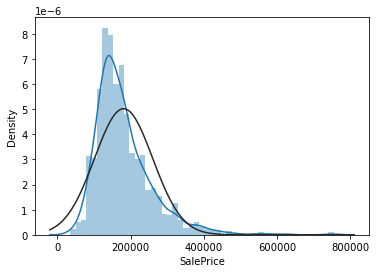

In [54]:
(mu, sigma) = norm.fit(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], kde = True, hist = True, fit = norm)

plt.show()

**Interpretation:**
* we can see the target variable `SalePrice` is not following normal distribution
* so we will normalize it

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

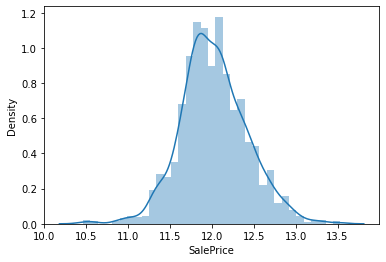

In [55]:
target = np.log1p(df_train['SalePrice'])
sns.distplot(target)

### Normalize the numerical variables

In [56]:
for col in df_train_num:
    df_train_num[col] = np.log1p(df_train_num[col])

In [57]:
for col in df_test_num:
    df_test_num[col] = np.log1p(df_test_num[col])

In [58]:
df_train_con = pd.concat([df_train_num, df_train_cat_enc], axis = 1, ignore_index = False)
df_test_con = pd.concat([df_test_num, df_test_cat_enc], axis = 1, ignore_index = False)

In [59]:
df_train_con = df_train_con.astype('float')
df_test_con = df_test_con.astype('float')

**we can check the dataset size**

In [60]:
print('Train dataset size: ',df_train_con.shape)
print('Test dataset size: ',df_test_con.shape)

Train dataset size:  (1460, 273)
Test dataset size:  (1459, 273)


### Splitting the dataset into train and test dataset

In [61]:
X_train, X_val, y_train, y_val = train_test_split(df_train_con, target, test_size = 0.2, random_state = 0)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('\nX_val: ', X_val.shape)
print('y_val: ', y_val.shape)

X_train:  (1168, 273)
y_train:  (1168,)

X_val:  (292, 273)
y_val:  (292,)


In [62]:
def model_scores(true, predicted):  
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [63]:
lr= LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_val, y_val)))
print("\n_____________________________________")
test_pred = lr.predict(X_val)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_val, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.95
Test set score: 0.77

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.10367947121124187
MSE: 0.03484945087626372
RMSE: 0.18668007627024294
R2 Square 0.7698157474414719
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06133262090008645
MSE: 0.007485939962339659
RMSE: 0.08652132663303111
R2 Square 0.9536362649279534
__________________________________


In [64]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Training set score: {:.2f}".format(dt.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(dt.score(X_val, y_val)))
print("\n_____________________________________")
test_pred = dt.predict(X_val)
train_pred = dt.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_val, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 1.00
Test set score: 0.66

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.15967282062151228
MSE: 0.0513133997618203
RMSE: 0.2265246118235727
R2 Square 0.6610696503554808
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [65]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rf.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(rf.score(X_val, y_val)))
print("\n_____________________________________")
test_pred = rf.predict(X_val)
train_pred = rf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_val, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.98
Test set score: 0.87

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.09409916406986236
MSE: 0.019427756883575974
RMSE: 0.13938348856150778
R2 Square 0.8716776424106978
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0368045194934257
MSE: 0.0029525778717755234
RMSE: 0.054337628507099237
R2 Square 0.9817133801613067
__________________________________


In [66]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print("Training set score: {:.2f}".format(gb.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(gb.score(X_val, y_val)))
print("\n_____________________________________")
test_pred = gb.predict(X_val)
train_pred = gb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_val, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.96
Test set score: 0.89

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.08907833039961553
MSE: 0.016710247959754867
RMSE: 0.12926812429889617
R2 Square 0.8896270718772304
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05772702549852616
MSE: 0.005916101740332861
RMSE: 0.07691619946625587
R2 Square 0.963358966926267
__________________________________


In [67]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print("Training set score: {:.2f}".format(xgb.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(xgb.score(X_val, y_val)))
print("\n_____________________________________")
test_pred = xgb.predict(X_val)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_val, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 1.00
Test set score: 0.87

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.09708954452124088
MSE: 0.020282797685965873
RMSE: 0.14241768740562344
R2 Square 0.8660300088596276
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.006183979969273062
MSE: 7.6145019352761e-05
RMSE: 0.00872611135344725
R2 Square 0.9995284002380345
__________________________________


In [68]:
X_train, y_train = df_train_con, target

# Cat Boost Regressor

cat = CatBoostRegressor()
cb = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [69]:
print("Training set score: {:.2f}".format(cb.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(cb.score(X_val, y_val)))
print("\n_____________________________________")
test_pred = cb.predict(X_val)
train_pred = cb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_val, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.99
Test set score: 0.99

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.026652630915199253
MSE: 0.0012072060025748441
RMSE: 0.03474487016200872
R2 Square 0.9920262786242028
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.025906512909388075
MSE: 0.0011313489891523378
RMSE: 0.03363553164664322
R2 Square 0.9929046979842823
__________________________________


In [70]:
feat_imp = cb.get_feature_importance(prettified=True)
feat_imp

Feature Id  Importances
0              OverallQual    19.663989
1                GrLivArea    11.749539
2              TotalBsmtSF     5.596775
3                 1stFlrSF     5.440076
4               BsmtFinSF1     3.239796
5              OverallCond     3.051660
6                      Age     3.003140
7             YearRemodAdd     2.930757
8               Fireplaces     2.888623
9                  LotArea     2.746832
10               YearBuilt     2.646229
11              GarageArea     2.494242
12              GarageCars     2.099860
13                2ndFlrSF     1.662851
14                FullBath     1.623000
15             SqFtPerRoom     1.517656
16                HalfBath     1.396556
17             BsmtQual_Gd     1.218294
18        GarageFinish_Unf     1.160850
19             LotFrontage     1.123972
20            CentralAir_Y     1.031089
21             GarageYrBlt     0.957345
22            TotRmsAbvGrd     0.751555
23        MSZoning_C (all)     0.644260
24           BldgType_1Fam     0.585597
25            CentralAir_N     0.569465
26   SaleCondition_Abnorml     0.550113
27               BsmtUnfSF     0.538040
28              WoodDeckSF     0.514231
29          KitchenQual_TA     0.512982
30          KitchenQual_Gd     0.510784
31    Neighborhood_Crawfor     0.475203
32          KitchenQual_Ex     0.466663
33             BsmtQual_Ex     0.460527
34         MasVnrType_None     0.459437
35             MSZoning_RL     0.452372
36             OpenPorchSF     0.417320
37               GarageAge     0.396874
38            BsmtFullBath     0.394668
39         BsmtExposure_No     0.391768
40         Condition1_Norm     0.373948
41             MSZoning_RM     0.359386
42              MSSubClass     0.355637
43    Neighborhood_Edwards     0.332943
44         BsmtExposure_Gd     0.320097
45          Functional_Typ     0.318672
46        Electrical_SBrkr     0.311488
47                Renovate     0.310207
48           EnclosedPorch     0.300377
49   SaleCondition_Partial     0.298844
50            HeatingQC_Ex     0.286113
51            LotShape_IR1     0.263809
52       HouseStyle_1Story     0.261078
53    SaleCondition_Normal     0.250893
54           RoofStyle_Hip     0.243315
55       HouseStyle_2Story     0.239102
56             ScreenPorch     0.235738
57        BsmtFinType1_GLQ     0.233587
58            PavedDrive_Y     0.229952
59              MasVnrArea     0.226752
60            BedroomAbvGr     0.209792
61     Exterior1st_BrkFace     0.203443
62            ExterQual_Gd     0.193425
63    SaleCondition_Family     0.191640
64             YrSold_2009     0.185270
65            ExterQual_TA     0.178333
66         LandContour_Bnk     0.176412
67              BsmtFinSF2     0.168192
68    Neighborhood_BrkSide     0.158396
69       Condition1_Artery     0.152613
70        BsmtFinType1_ALQ     0.132144
71            PavedDrive_N     0.130604
72            ExterCond_Fa     0.107533
73         RoofStyle_Gable     0.107467
74      Neighborhood_NAmes     0.104768
75            ExterQual_Ex     0.103970
76             MSZoning_FV     0.101418
77       GarageType_Detchd     0.101100
78       LotConfig_CulDSac     0.097613
79      MasVnrType_BrkFace     0.096815
80       HouseStyle_1.5Fin     0.085660
81            KitchenAbvGr     0.085308
82                MoSold_2     0.083746
83    Neighborhood_StoneBr     0.080263
84    Neighborhood_OldTown     0.078464
85            SaleType_New     0.071964
86         LandContour_Lvl     0.069948
87             SaleType_WD     0.065943
88               MoSold_12     0.063389
89     Exterior1st_MetalSd     0.060306
90                PoolArea     0.060102
91            LotShape_Reg     0.059727
92             YrSold_2010     0.058251
93         Functional_Maj2     0.055603
94             BsmtCond_TA     0.054882
95            HeatingQC_Gd     0.054393
96                MoSold_7     0.051792
97     Exterior1st_VinylSd     0.046392
98           GarageQual_Fa     0.044815
99            He

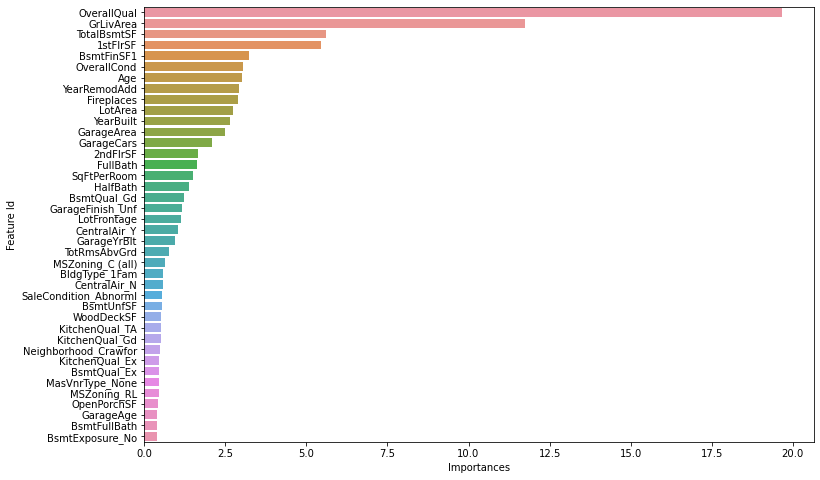

In [71]:
 plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:40],feat_imp['Feature Id'][:40], orient = 'h')
plt.show()

In [72]:
train_pool = Pool(X_train)
val_pool = Pool(X_val)

explainer = shap.TreeExplainer(cb) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

# The plot represents just a slice of the Training data (200 observations)

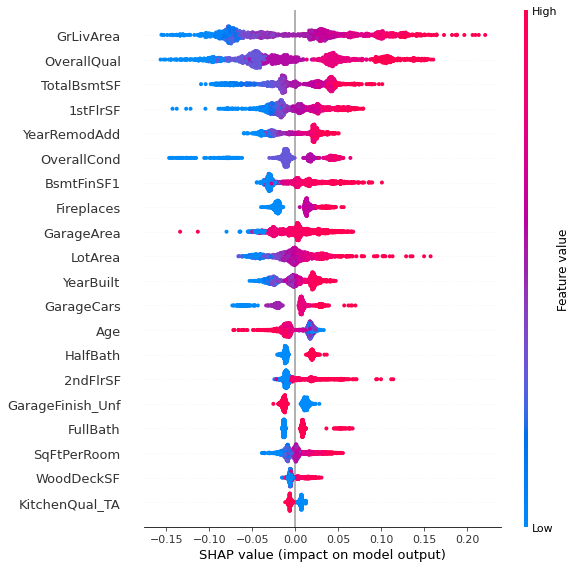

In [73]:
shap.summary_plot(shap_values, X_train)

**Default CatBoost parameters**

In [74]:
cb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.04949399828910827,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1

### Hyperparameter Tuning of CatBoost Regressor

In [75]:
params = {'iterations': [16000,20000,25000,30000],
          'learning_rate': [0.04,0.05,0.01,0.001],
        'depth': [3,4,5,6,7,8],
        'l2_leaf_reg': [1, 3, 5, 9,13,15,17],
        'max_leaves' : [8,10,12,14,16,32,64],
#         'early_stopping_rounds': [200],
        'model_size_reg' : [0.2,0.5,0.7,0.9]}

**Got this set of hyperparameter using Google Colab**

In [76]:
params = {'max_leaves': 8,
          'depth': 3,
          'od_wait': 200,
          'l2_leaf_reg': 3,
          'iterations': 20000,
          'model_size_reg': 0.7,
          'learning_rate': 0.05,
          'random_seed': 42 }

In [77]:
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = model_scores(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE: 0.0015464623133069203
MSE: 4.403419521387398e-06
RMSE: 0.002098432634464923
R2 Square 0.9999709149554513
__________________________________


In [80]:
test_pred = cat_model_f.predict(df_test_con)
final_price = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
final_price['SalePrice'] = test_pred 
final_price.head()

Id      SalePrice
0  1461  123904.221422
1  1462  162791.804228
2  1463  193265.543782
3  1464  200126.538710
4  1465  177138.106406